Transverse Ising model

$H = -J \sum_{i=1}^L X_i X_{i+1} -h \sum_{i = 1}^L Z_i$

In [90]:
import numpy as np

X = np.array([[0,1],[1,0]])    # Pauli matrix sigma_x
Z = np.array([[1,0],[0,-1]])   # Pauli matrix sigma_z

XX = np.kron(X,X)  # np.kron  : KroneckerProduct

L = 9
J = 1.0

newlist_E1 = []
newlist_h = []

for h in np.arange(0, 2.00, 0.01) :
    H = -np.kron(np.kron(X, np.eye(pow(2,(L-2)))),X)
    for i in range(1, L) :
        H = H - np.kron(np.eye(pow(2,(i-1))), np.kron(J*XX, np.eye(pow(2,(L-1-i)))))
    for i in range(1, L+1) :
        H = H - np.kron(np.eye(pow(2,(i-1))), np.kron(h*Z, np.eye(pow(2,(L-i)))))
    E1 = np.linalg.eigvals(H)
    E1.sort()
    list = E1 - E1[0]
    list_E1 = [list[i] for i in range(L*L-L+2)]
    list_h = [h for i in range(L*L-L+2)]
    newlist_E1.append(list_E1) 
    newlist_h.append(list_h)


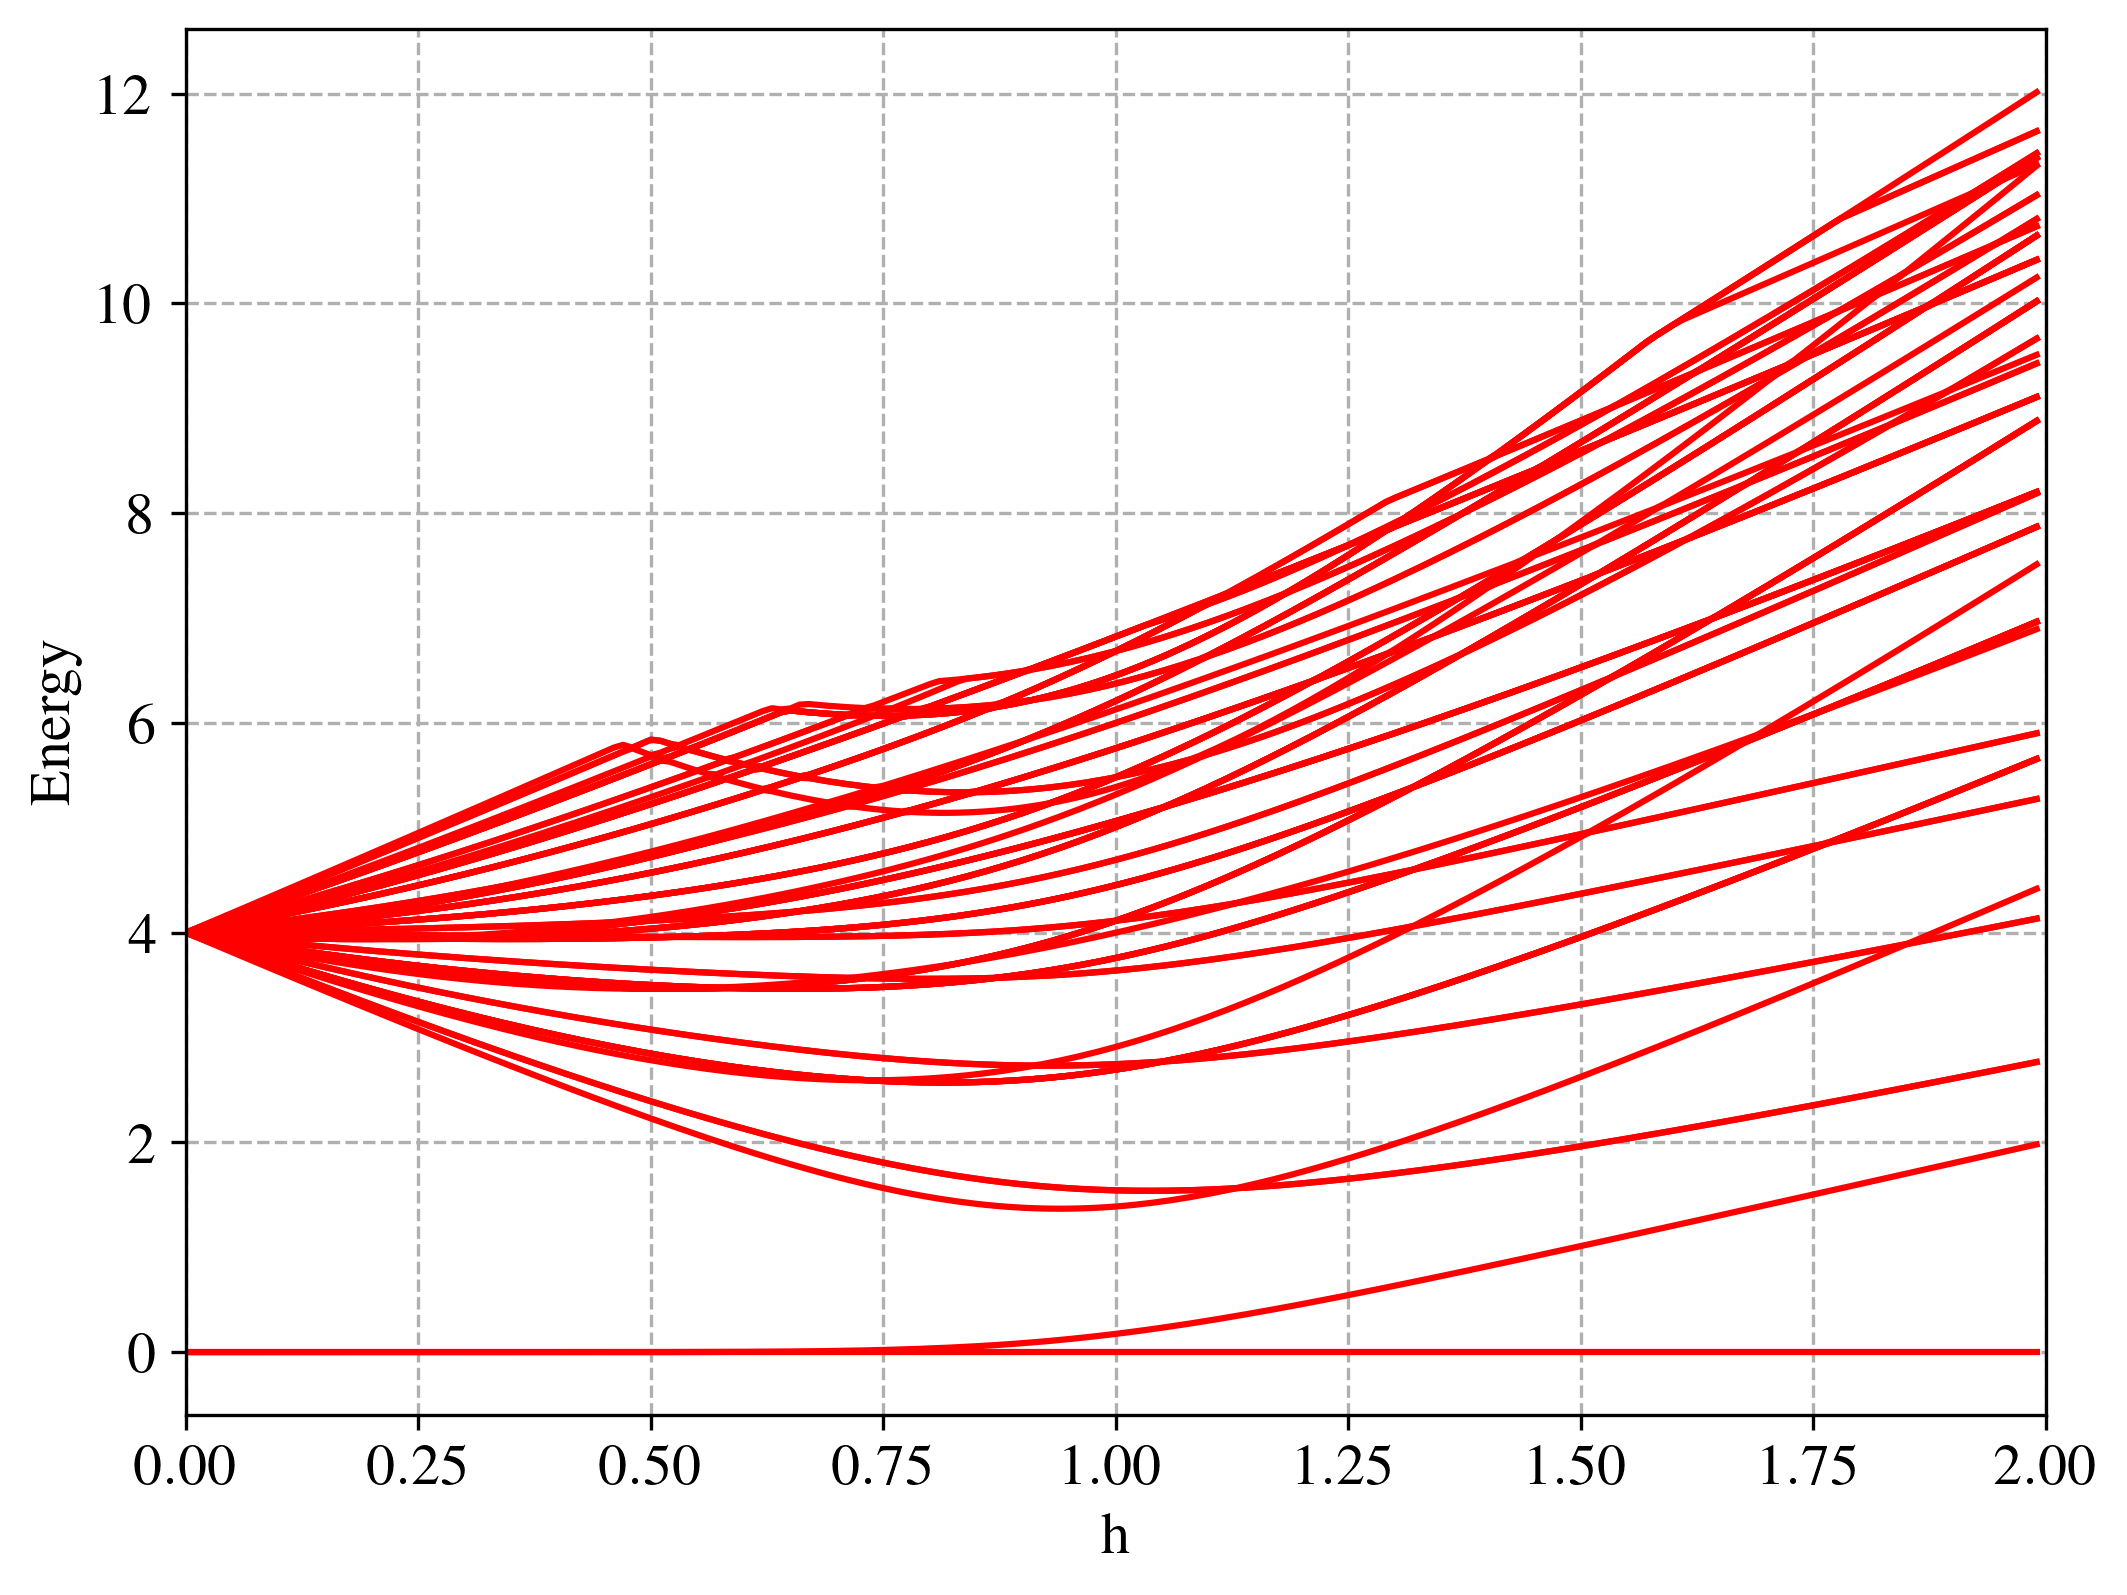

In [93]:
import matplotlib.pyplot as plt

%matplotlib inline

#plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('text', usetex = True)     # rc : runtime configuration
plt.rc('font', family='times')

plt.figure(figsize = (8,6), dpi=300)
plt.plot(newlist_h, newlist_E1, 'r')
plt.ylabel('Energy', fontsize=14)
plt.xlabel(r'h', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(linestyle='dashed')
plt.xlim(0, 2)
plt.savefig("XX.png")
plt.show()
